Where does the water rise from node 0, when it rises to a given height.
The numbers on the arrows are the "terrain" heights.
Enter the height of the water  8... 22 m : 15
Enter the ship's draft: 3


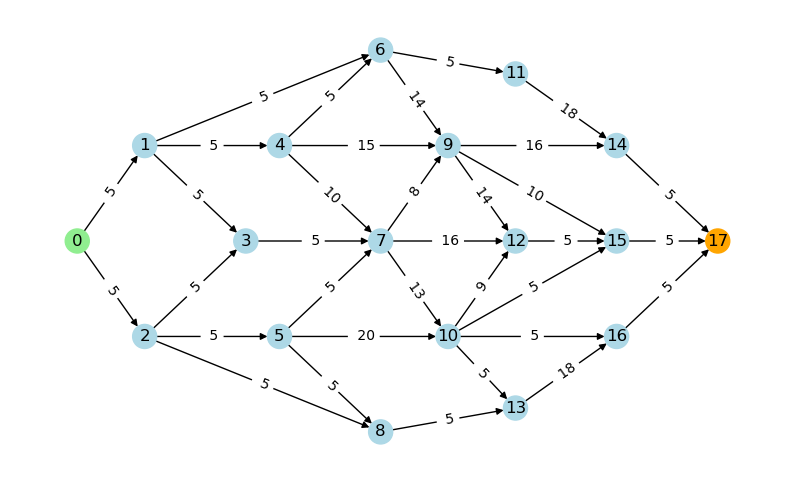

In [8]:
# BFS_2.  WATERWAY 
# Height is given to the water and draft to the ship. 
# We are looking for navigable waterways.

# INIT
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd

%matplotlib inline   
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

# CREATE GRAPH
# Nodes:
G = nx.DiGraph()
G.add_nodes_from([
     (0, {"color": "lightgreen",}),
     (1, {"color": "lightblue",}),
     (2, {"color": "lightblue",}),
     (3, {"color": "lightblue",}),
     (4, {"color": "lightblue",}), 
     (5, {"color": "lightblue",}), 
     (6, {"color": "lightblue",}),
     (7, {"color": "lightblue",}),
     (8, {"color": "lightblue",}),
     (9, {"color": "lightblue",}),
     (10,{"color": "lightblue",}),
     (11,{"color": "lightblue",}),
     (12,{"color": "lightblue",}),
     (13,{"color": "lightblue",}),
     (14,{"color": "lightblue",}),
     (15,{"color": "lightblue",}),
     (16,{"color": "lightblue",}),
     (17,{"color": "orange"   ,}),
     ])
# Node positions
ps = {0:(0, 0),   1:(2, 0.4),   2:(2,-0.4),  3:(5, 0),  4:(6, 0.4), 
      5:(6,-0.4,),  6:(9, 0.8),  7:(9, 0),  8:(9,-0.8), 9:(11,0.4 ),
     10:(11,-0.4 ), 11:(13, 0.7), 12:(13,0 ), 13:(13,-0.7 ),
     14:(16,0.4 ), 15:(16,0 ),  16:(16,-0.4 ), 17:(19,0 )}

# Node colors are collected into a list of dictionary values:
ncols = nx.get_node_attributes(G, 'color').values()  #(-> tulostukseen

# Edges
G.add_edges_from([
        (0, 1, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (0, 2, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (1, 3, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (1, 4, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (1, 6, {"height": 5, "weight": 7, "color":'k', "width": 1}),
        (2, 3, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (2, 5, {"height": 5, "weight": 3, "color":'k', "width": 1}),
        (2, 8, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (3, 7, {"height": 5, "weight": 3, "color":'k', "width": 1}),
        (4, 6, {"height": 5, "weight": 6, "color":'k', "width": 1}),
        (4, 7, {"height": 10, "weight": 4, "color":'k', "width": 1}),
        (4, 9, {"height": 15, "weight": 2, "color":'k', "width": 1}),
        (5, 7, {"height": 5, "weight":16, "color":'k', "width": 1}),
        (5, 8, {"height": 5, "weight": 2, "color":'k', "width": 1}),
        (5,10, {"height": 20, "weight":17, "color":'k', "width": 1}),
        (6, 9, {"height": 14, "weight":18, "color":'k', "width": 1}),
        (6,11, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (7, 9, {"height": 8, "weight": 1, "color":'k', "width": 1}),
        (7,10, {"height": 13, "weight": 3, "color":'k', "width": 1}),
        (7,12, {"height": 16, "weight": 5, "color":'k', "width": 1}),
        (8,13, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (9,12, {"height": 14, "weight":30, "color":'k', "width": 1}),
        (9,14, {"height": 16, "weight": 3, "color":'k', "width": 1}),
        (9,15, {"height": 10, "weight":18, "color":'k', "width": 1}),
        (10,12,{"height": 9, "weight": 4, "color":'k', "width": 1}),
        (10,13,{"height": 5, "weight": 2, "color":'k', "width": 1}),
        (10,15,{"height": 5, "weight":17, "color":'k', "width": 1 }),
        (10,16,{"height": 5, "weight":16, "color":'k', "width": 1 }),
        (11,14,{"height": 18, "weight": 3, "color":'k', "width": 1 }),
        (12,15,{"height": 5, "weight": 6, "color":'k', "width": 1 }),
        (13,16,{"height": 18, "weight": 4, "color":'k', "width": 1 }),
        (14,17,{"height": 5, "weight": 3, "color":'k', "width": 1 }),
        (15,17,{"height": 5, "weight": 6, "color":'k', "width": 1 }),
        (16,17,{"height": 5, "weight": 4, "color":'k', "width": 1 }),
    ])

# DRAW 
# Edge atributes into dictionaries:
edge_height = nx.get_edge_attributes(G,'height')
ecols = nx.get_edge_attributes(G, 'color').values()
widths = nx.get_edge_attributes(G, 'width').values()

# Draw the Graph:
plt.rcParams["figure.figsize"] = [10, 6]    # Kuva-alueen koko
nx.draw_networkx(G,
        pos=ps,             # Node positions
        node_color=ncols,   # Node colors
        font_color= 'k',    # For nodes
        edge_color=ecols,   # Edge colors from the dictionary
        with_labels=True,)  # Visible node labeles 
# For the edge labels create a dictionary 'elabs', where the key is an edge and..
# the value is 'edge_height':
elabs = dict([((u,v), f' {edge_height[u,v]}')   for u,v in G.edges])  
# Edge labels inclusion in the drawing: 
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs) 
plt.axis("off")           
print('Where does the water rise from node 0, when it rises to a given height.' )
print('The numbers on the arrows are the "terrain" heights.')
waterlevel = int(input('Enter the height of the water  8... 22 m : '))
draft = int(input("Enter the ship's draft: "))

In [9]:
# ALGORITHM to find the paths
# Recidual Graph RG: Remove the edges where the water depth is not enough.
RG = G.copy() 
# Let's calculate the height of the water below the bottom of the ship for each edge 'free_below'.
# 'free below' = 'waterlevel' - base height 'height' - 'draft'
for u,v in G.edges:   
    free_below = waterlevel - (G.edges[(u,v)]['height'] + draft)
    if free_below <= 0:  # No water remains under the bottom of the ship
        RG.remove_edge(u,v)
#print('Edges of sufficient depth:', RG.edges) 

# BFS in the Recidual Graph RG. -> Kulkukelpoiset väylät nodesta 0. 
bfs_eds = list(nx.bfs_edges(RG, 0))
print('Kulkukelpoiset edget nodesta 0:', bfs_eds)
bfs_nods = [0] + [v for u, v in bfs_eds]  # The nodes from the edge list 
print('Saavutetavissa olevat nodet:', bfs_nods) 

Kulkukelpoiset edget nodesta 0: [(0, 1), (0, 2), (1, 3), (1, 4), (1, 6), (2, 5), (2, 8), (3, 7), (6, 11), (8, 13), (7, 9), (9, 15), (15, 17)]
Saavutetavissa olevat nodet: [0, 1, 2, 3, 4, 6, 5, 8, 7, 11, 13, 9, 15, 17]


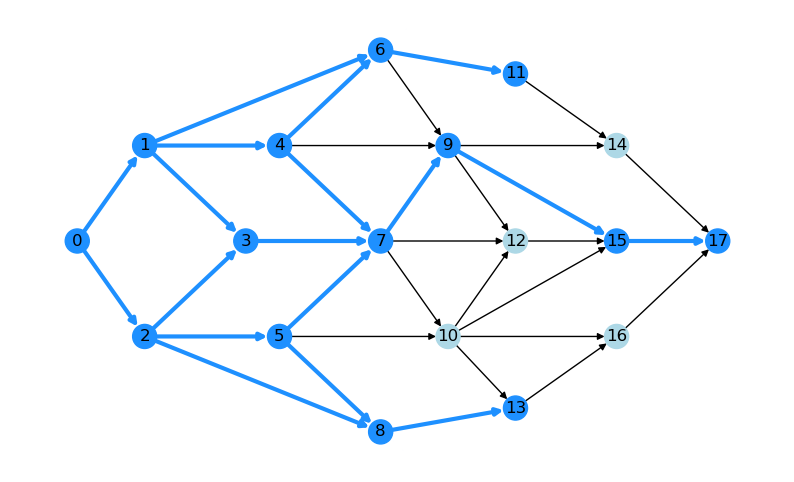

In [10]:
# TULOSTUS 
# Ratkaisun korostus tulostusta varten (väri, viivan paksuus)
# Värikartta: https://matplotlib.org/stable/gallery/color/named_colors.html
# Blue color for solution path nodes:
for n in G.nodes:
    if n in bfs_nods:
        G.nodes[n]['color']= 'dodgerblue'

# Blue color for solution path edges and make them thicker:
for u, v in G.edges:
    if (u, v) in bfs_eds:
        G.edges[(u,v)]['color']= 'dodgerblue'
        G.edges[(u,v)]['width']= 3

# BFS does not print all valid edges for a given node.
# These are the ones with both ends already colored,
# but edge has remained black 'k'. Let's highlight these edges too:
for u,v in G.edges:
    free_below = waterlevel - (G.edges[(u,v)]['height'] + draft)
    if free_below > 0 and G.nodes[u]['color']== 'dodgerblue'\
    and G.edges[(u,v)]['color']== 'k'\
    and G.nodes[v]['color']== 'dodgerblue':
        G.edges[(u,v)]['color']= 'dodgerblue'
        G.edges[(u,v)]['width']= 3

# Edge colors and thicknesses  into dictionaries
ecols = nx.get_edge_attributes(G, 'color').values()
widths = list(nx.get_edge_attributes(G, 'width').values()) 

# Node colors into dictionary:
ncols = nx.get_node_attributes(G, 'color').values()

# DRAW:
plt.rcParams["figure.figsize"] = [10, 6]    
nx.draw_networkx(G,
        pos=ps,               # Nodepositions
        node_color=ncols,     
        font_color= 'k',      # For nodes
        edge_color=ecols,     
        width= widths,        # For edges
        with_labels=True,)

plt.axis("off")               # No Frames around the picture                             
plt.show()